In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from package.utils import Explore
from package.utils import ARIMAPredict
from package.utils import Evalutaion

#### 加载数据

In [2]:
leaf = ('i38', 'e10', 'c1', 'p13', 'l4') #  diff=1
# leaf = ('i38', 'e10', 'c1', 'p10', 'l3')
leaf = ('&').join(leaf)
ts = pd.read_csv('../result/leaves/leaves_KPISet_smothing/%s.csv' % leaf)
colName = 'smoothed'
ts1 = ts[colName][:2016]
ts2 = ts['true'][2016:]

#### 数据探索

/Users/Jeremy/miniconda3/envs/ml/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


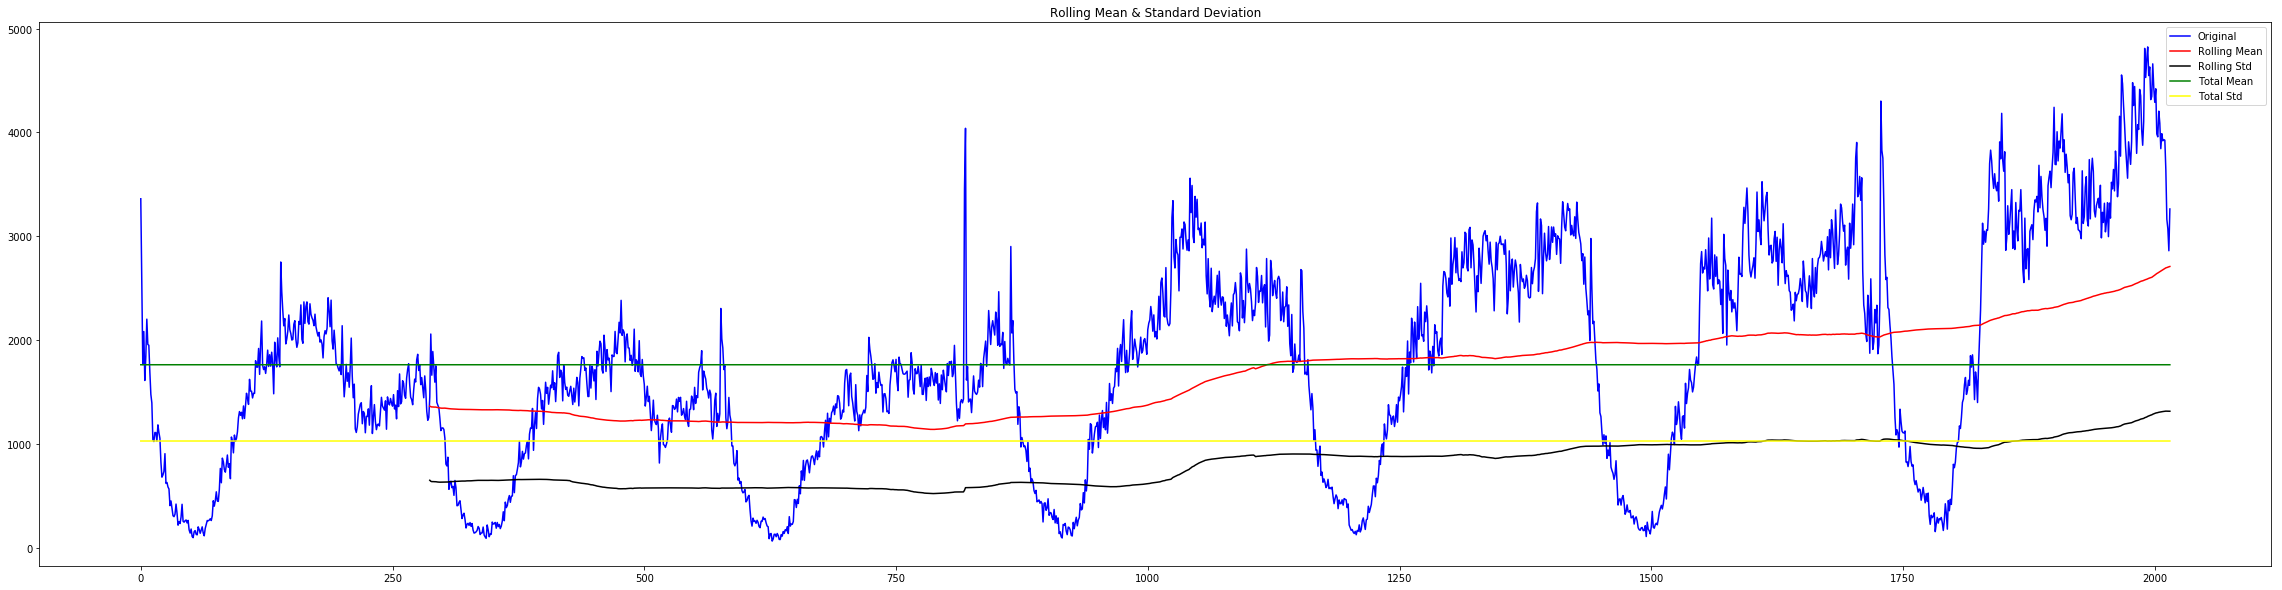

原始序列经过1阶差分后归于平稳，p值为0.000000
原始序列为非白噪声序列，对应的p值为：0.0
1阶差分序列为非白噪声序列，对应的p值为：1.11629551278e-33


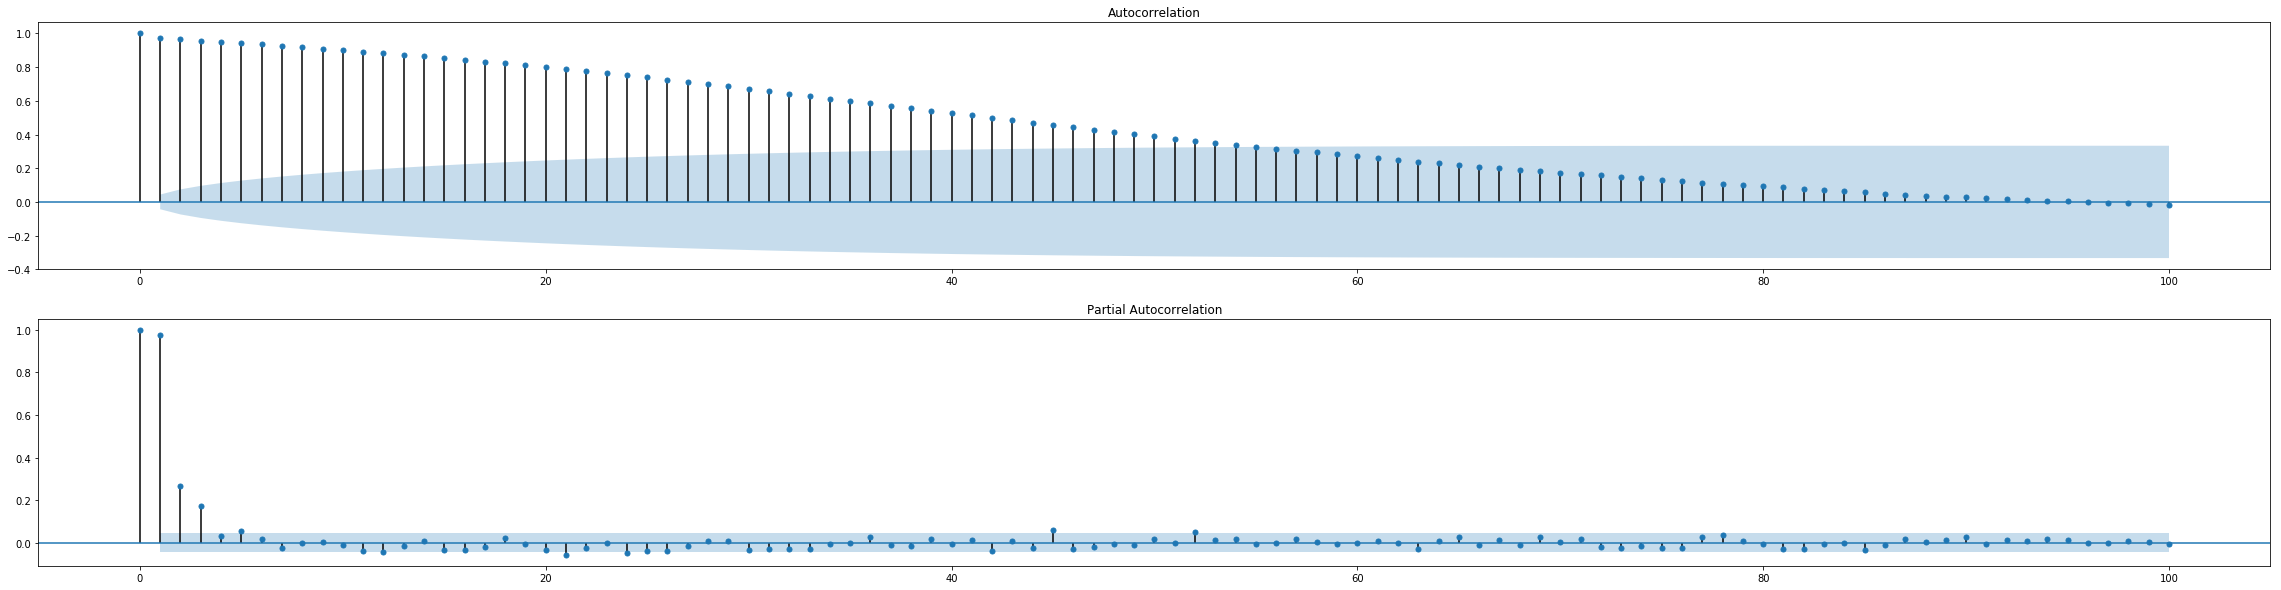

In [3]:
explore = Explore()
# 平稳性检测
d = explore.stationarity_test(ts1)

# 滚动统计
explore.rolling_statistics(ts1, 288)

# 平稳性检测
d = explore.stationarity_test(ts1, True)

#对序列做白噪声检验
isWN = explore.whitenoise_test(ts1, d, True)

# 画出自相关系数与偏自相关系数
explore.plot_acfandpacf(ts1)

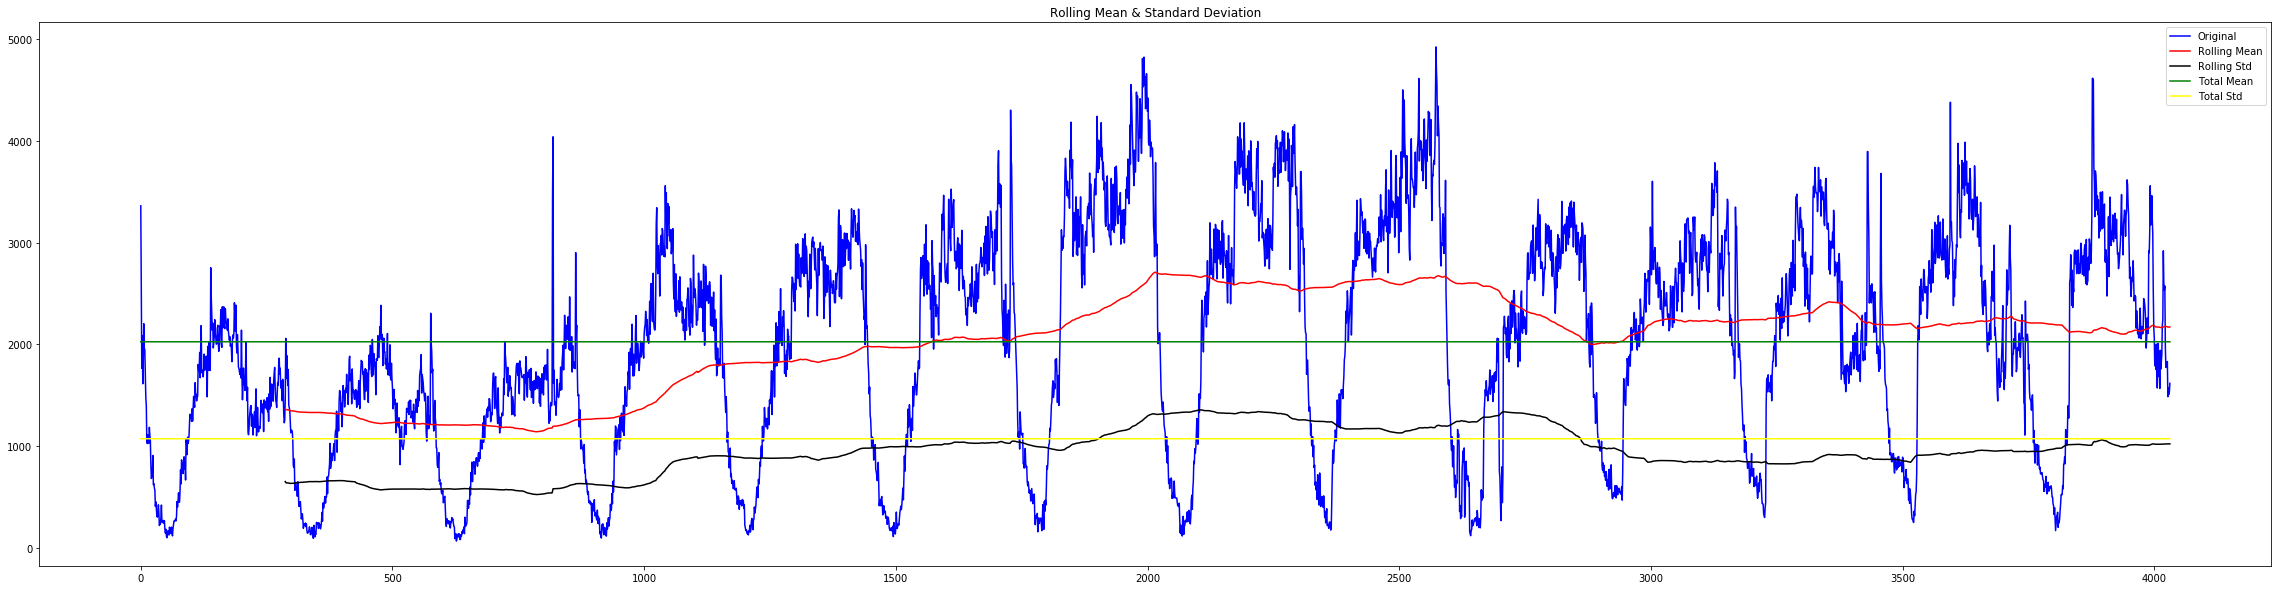

In [4]:
explore.rolling_statistics(ts[colName], 288)

#### 数据训练和预测

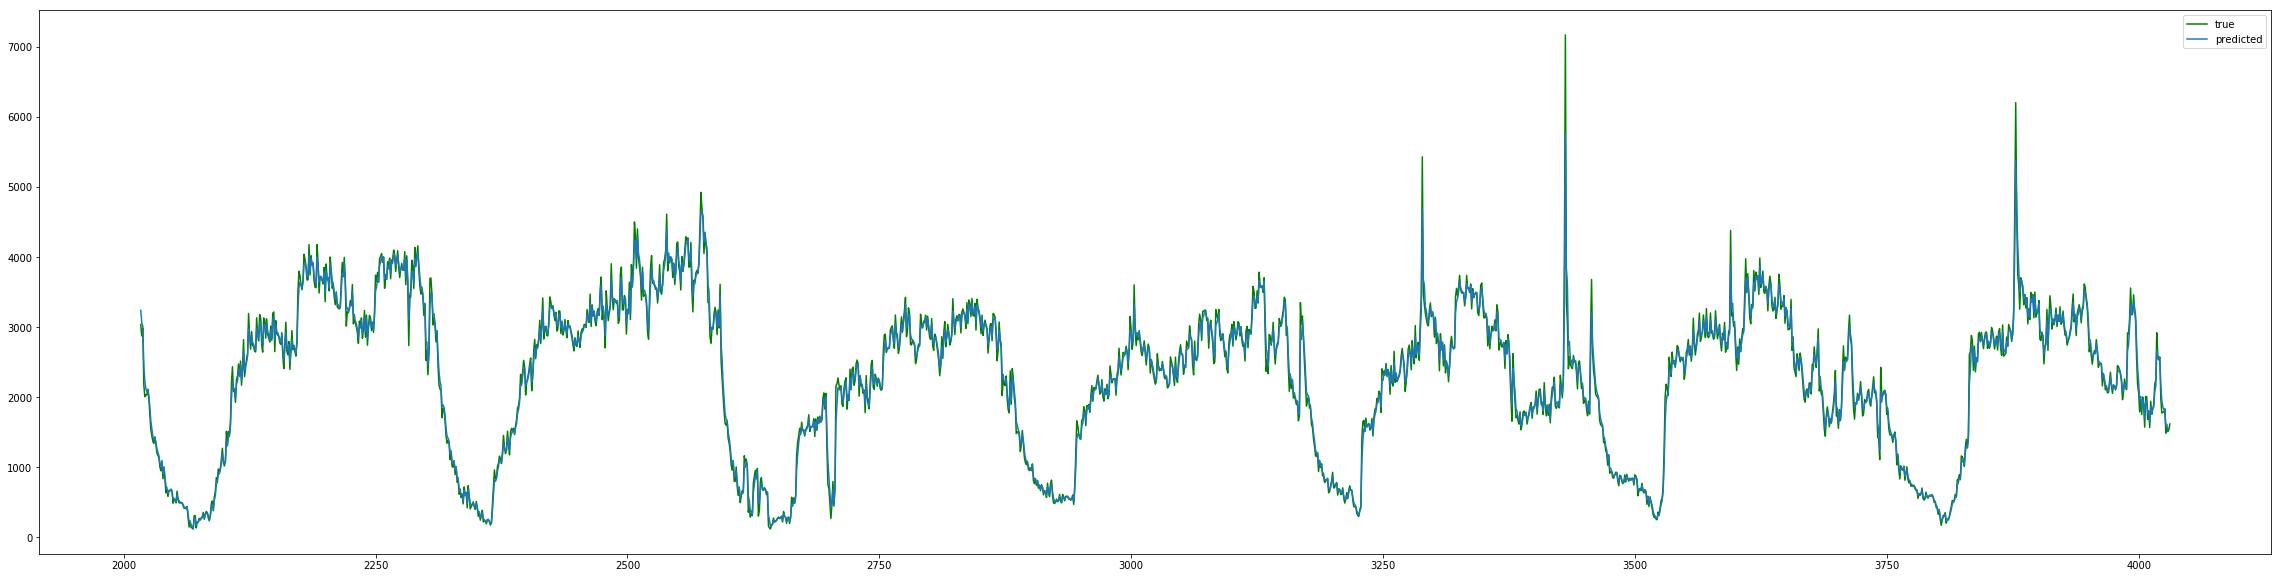

In [5]:
arima = ARIMAPredict(leaf)
# 训练模型
arima.train(ts1, d, 2, 3, select=False)
# 预测
ts_pred = ts2
if d == 1:
    ts_pred = ts2.diff(d).dropna()
predict = arima.predict(ts_pred)

if d == 1:
    predict =  predict + ts2[:-d]
# 可视化预测结果
arima.plot_results(ts2[d:], predict)
# 保存模型
arima.save('../')

#### 加载模型

In [6]:
# arima1 = ARIMAPredict('i06&e10&c5&p11&l4')
# arima1.load('../model')
# predict = arima1.predict(ts2)
# arima.plot_results(ts2, predict)

#### 结果评估

MAE 180.123309733


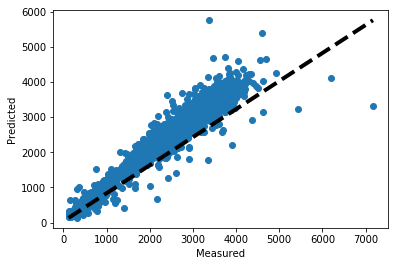

In [7]:
eva = Evalutaion()
eva.evaluate(ts2[d:], predict, 'MAE', True)
eva.visualize(ts2[d:], predict)

#### 如果训练数据与测试数据一致则结果为原生的ARMA样本内预测

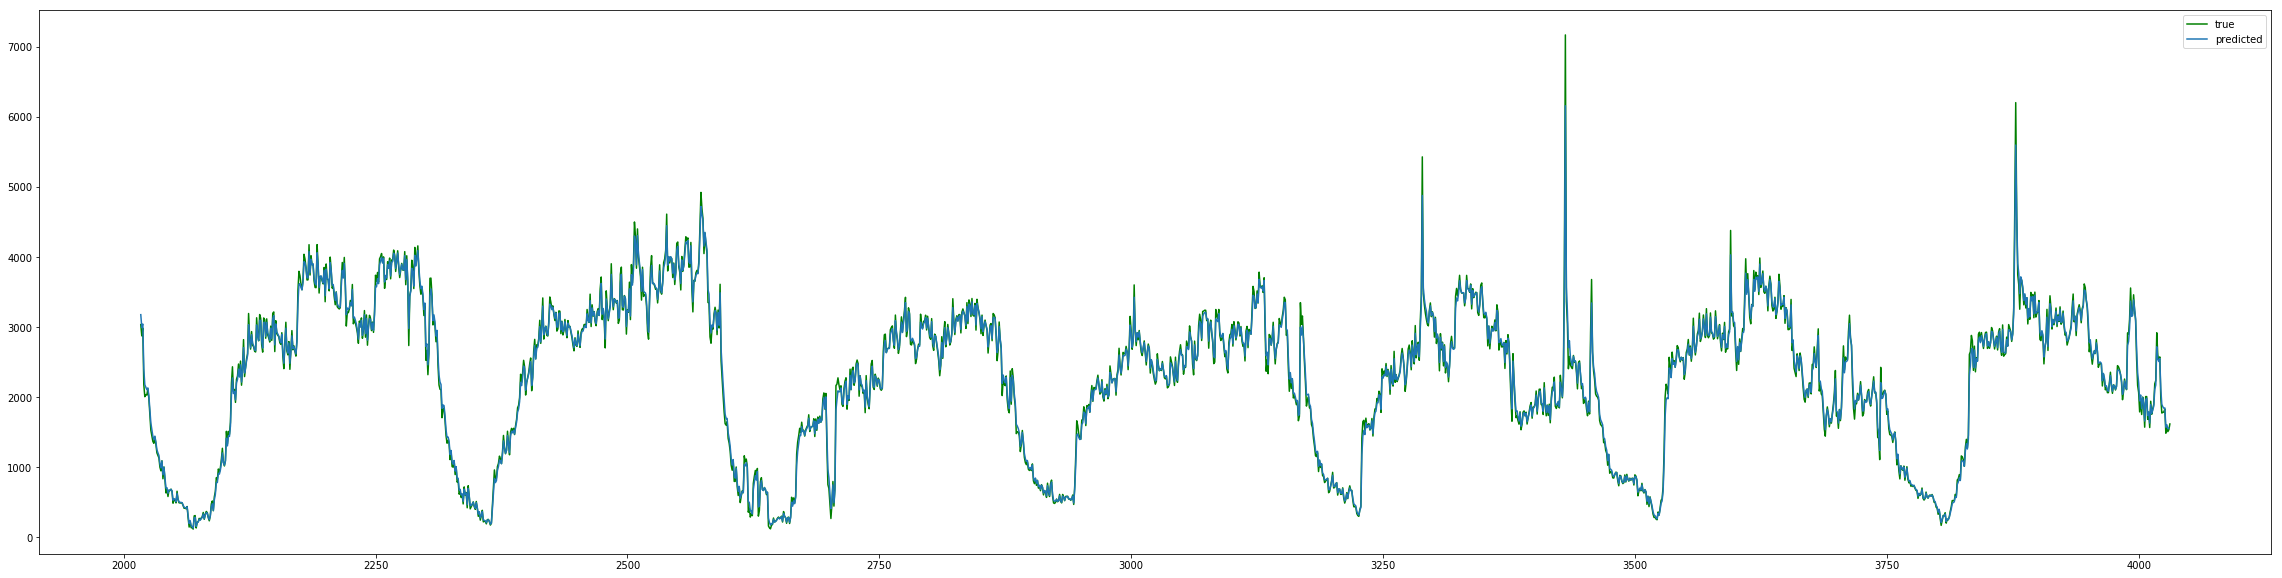

In [8]:
arima2 = ARIMAPredict(leaf)
# 训练模型
arima2.train(ts2, d, 5, 1, select=False)
# 预测
ts_pred2 = ts2
if d == 1:
    ts_pred2 = ts2.diff(d).dropna()
predict2 = arima2.predict(ts_pred2)

if d == 1:
    predict2 =  predict2 + ts2[:-d]
# 可视化预测结果
arima2.plot_results(ts2[d:], predict2)

MAE 179.431722888


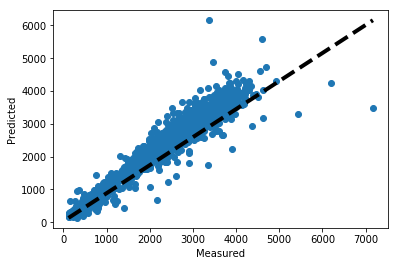

In [9]:
eva = Evalutaion()
eva.evaluate(ts2[d:], predict2, 'MAE', True)
eva.visualize(ts2[d:], predict2)